(lecture12:the-standard-normal)=
# The standard Normal distribution

The standard normal distribution is perhaps the most recognizable continuous distribution.
It has that characteristic bell shape.
We write:

$$
Z \sim N(0,1),
$$

and we read it as:

> $Z$ follows the standard Normal.

Now the 0 in $N(0,1)$ is the expected value and the 1 is the variance.
We will see that later.

(lecture12:the-standard-normal:pdf)=
## The PDF of the standard Normal
We commonly use the function $\phi(z)$ to represent the PDF of the standard Normal.
It is:

$$
\phi(z) = \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{z^2}{2}\right\}.
$$

So, this is an exponential that has $z^2$ inside it.
The term $\frac{1}{\sqrt{2\pi}}$ is there so that the PDF is normalized, i.e.:

$$
\int_{-\infty}^{+\infty}\phi(z)dz = 1.
$$

Here is how you can make a standard Normal in `scipy.stats`:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

In [2]:
Z = st.norm()

And here are some samples from it:

In [3]:
Z.rvs(size=10)

array([ 0.07650491, -0.55433992,  0.35401783,  0.26572118, -0.5496704 ,
        0.47381155, -0.53989222,  1.13163748,  1.23093609,  0.42745344])

And here is the PDF of the standard normal:

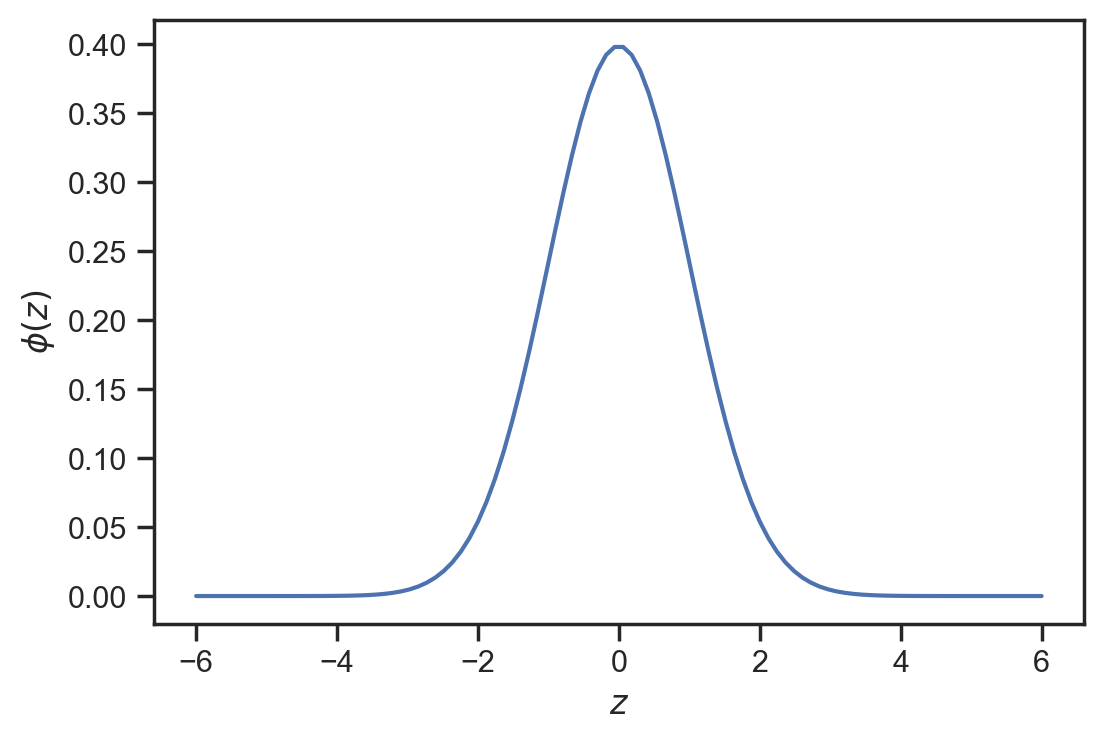

In [4]:
fig, ax = plt.subplots()
zs = np.linspace(-6.0, 6.0, 100)
ax.plot(zs, Z.pdf(zs))
ax.set_xlabel('$z$')
ax.set_ylabel('$\phi(z)$');

Here are some important properties of the PDF of the standard Normal:

+ First, $\phi(z)$ is positive for all $z$.

+ Second, as $z$ goes to $-\infty$ or $+\infty$, $\phi(z)$ goes to zero.

+ Third, $\phi(z)$ has a unique mode (maximum) at $z=0$.
In other words, $z=0$ is the most probable point under this distribution.

+ Fourth, $\phi(z)$ is symmetric about $z=0$.
Mathematically:

$$
\phi(-z) = \phi(z).
$$

Let's test some of them using `scipy.stats`.

In [6]:
Z.pdf(np.inf)

0.0

In [7]:
Z.pdf(-np.inf)

0.0

In [8]:
Z.pdf(-5) == Z.pdf(5)

True

## Expectation of the standard normal

The expectation of $Z$ is:

$$
\mathbf{E}[Z] = \int_{-\infty}^{+\infty}z\phi(z)dz = 0.
$$

You can prove this quite easily by invoking the fact that $\phi(-z) = \phi(z)$.

Here it is in `scipy.stats`:

In [9]:
Z.expect()

0.0

## Variance of the standard normal

The variance of $Z$ is:

$$
\mathbf{V}[Z] = \int_{-\infty}^{+\infty}z^2\phi(z)dz = 1.
$$

You need [integration by parts](https://en.wikipedia.org/wiki/Integration_by_parts) to prove this. Let's do it.

$$
\begin{split}
\mathbf{V}[Z] &= \int_{-\infty}^{+\infty}z^2\phi(z)dz\\
&=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} z^2\exp\left\{-\frac{z^2}{2}\right\}dz\\
&=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} (-z)\cdot\left[-z\exp\left\{-\frac{z^2}{2}\right\}\right]dz\\
&=-\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} z\cdot\frac{d}{dz}\left[\exp\left\{-\frac{z^2}{2}\right\}\right]dz\\
&= -\frac{1}{\sqrt{2\pi}}\left\{\left[z\exp\left\{-\frac{z^2}{2}\right\}\right]_{-\infty}^{+\infty}
-\int_{-\infty}^{+\infty}
\exp\left\{-\frac{z^2}{2}\right\}dz\right\}\\
&= -\frac{1}{\sqrt{2\pi}}\left(0
-\sqrt{2\pi}\right)\\
&= 1.
\end{split}
$$

Note that the standard deviation of $Z$ is also 1 ($Z$ does not have units).

Again, here it is in `scipy.stats`:

In [10]:
Z.var()

1.0

## The CDF of the standard Normal

The CDF of $Z$ gives you the probability that $Z$ is smaller than a number $z$.
It is common to use $\Phi(z)$ to denote the CDF.
There is no closed form.
But you can write this:

$$
\Phi(z) = \int_{-\infty}^z \phi(z') dz',
$$

where $\phi(z)$ is the PDF of $Z$.
Let's plot it.

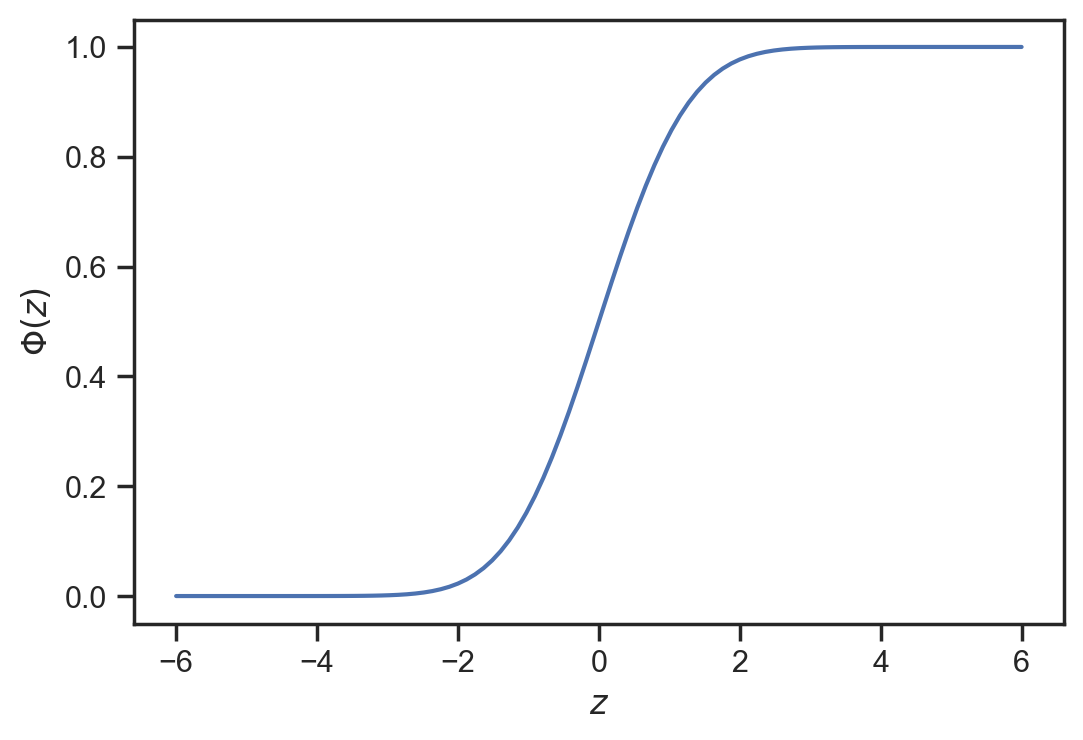

In [11]:
fig, ax = plt.subplots()
ax.plot(zs, Z.cdf(zs))
ax.set_xlabel('$z$')
ax.set_ylabel('$\Phi(z)$');

## Some properties of the CDF of the standard normal

First, note that:

$$
\Phi(0) = 0.5.
$$

This follows very easily from the symmetry of the PDF $\phi(z)$ about zero.
Remember that $\Phi(0)$ is the probability that $Z$ is smaller than zero and because of symmetry that probability is exactly 50\%.
A point $z$ with such a property (the probability that the random variable is smaller than it is 0.5) is called the *median* of the random variable.

Now here is a non-trivial property.
Take any number $z$.
Then, we have:

$$
\Phi(-z) = 1 - \Phi(z).
$$

Before attempting to prove this property, let's demonstrate it visually.
Take $z$ to be some positive number.
Then $\Phi(-z)$ is the probability that $Z$ is smaller than $-z$, or this area below the PDF:

$$
\Phi(-z) = \int_{-\infty}^{-z}\phi(z')dz'.
$$

On other hand, $1 - \Phi(z)$ is the following area:
$$
\begin{split}
1 - \Phi(z) &= \int_{-\infty}^{+\infty}\phi(z')dz' - \int_{-\infty}^z\phi(z')dz'\\
&= \int_{-\infty}^{z}\phi(z')dz' + \int_{z}^{+\infty}\phi(z')dz' - \int_{-\infty}^z\phi(z')dz'\\
&= \int_{z}^{+\infty}\phi(z')dz'.
\end{split}
$$
Notice that we used the fact that $\phi(z)$ is normalized and a standard property of the integral.

Alright, so visually, the expression $\Phi(-z) = 1 - \Phi(z)$ means that the red and the blue areas in the following plot are the same for any $z$:

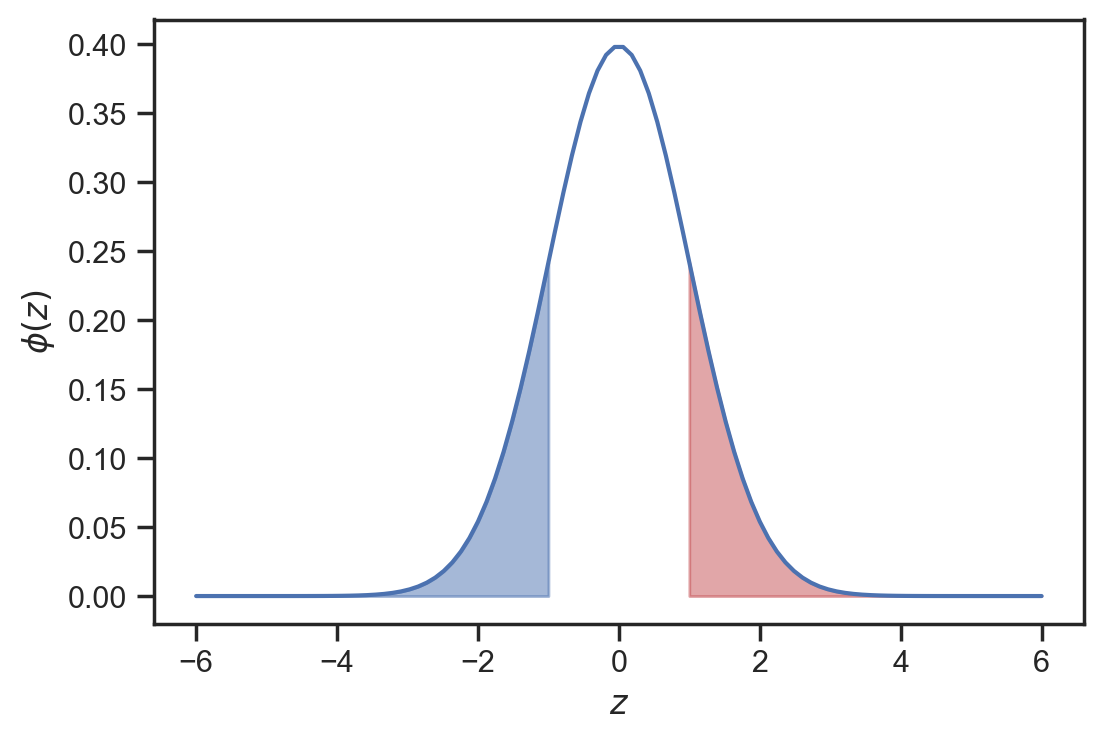

In [32]:
fig, ax = plt.subplots()
ax.plot(zs, Z.pdf(zs))
z = 1
zsb = np.linspace(-6.0, -z, 100)
zsa = np.linspace(z, 6.0, 100)
ax.fill_between(zsb, 0.0, Z.pdf(zsb), color='b', alpha=0.5)
ax.fill_between(zsa, 0.0, Z.pdf(zsa), color='r', alpha=0.5)
ax.set_xlabel('$z$')
ax.set_ylabel('$\phi(z)$');

And this makes a lot of sense since $\phi(z)$ is symmetric.
So, in words the property says:

> The probability that $Z$ is smaller than $-z$ is the same as the probability that $Z$ is greater than $z$.

The formal proof is actually trivial.
It goes like this:

$$
\begin{split}
\Phi(-z) &= \int_{-\infty}^{-z}\phi(z')dz'\\
&= \int_{+\infty}^{z}\phi(\tilde{z})(-1)d\tilde{z},
\end{split}
$$

after applying the transformation $\tilde{z} = -z'$.
And finally:

$$
\int_{+\infty}^{z}\phi(\tilde{z})(-1)d\tilde{z} = -\int_{+\infty}^{z}\phi(\tilde{z})d\tilde{z}
= \int_{z}^{+\infty}\phi(\tilde{z})d\tilde{z},
$$

which as we saw above is the same as $1 - \Phi(z)$.

Let's demonstrate this in `scipy.stats`:

In [22]:
print('p(Z <= -1) = {0:1.3f}'.format(Z.cdf(-1)))

p(Z <= -1) = 0.16


And this should be the same as the probability that $Z$ is greater than 1, which is:

In [24]:
print('p(Z >= 1) = {0:1.3f}'.format(1 - Z.cdf(1)))

p(Z >= 1) = 0.16


What is the probability that $Z$ is between $-1$ and $1$? It is:

$$
p(-1 < Z < 1) = 1 - p(Z \le -1) - p(Z \ge 1) = 1 - 2 \Phi(-1).
$$

In `scipy.stats`:

In [31]:
print('p(-1 < Z < 1) = {0:1.3f}'.format(1 - 2.0 * Z.cdf(-1)))

p(-1 < Z < 1) = 0.683


## Questions 

+ Modify the code above to find the probability that $Z$ is between -2 and 2.
+ Repeat for $Z$ between -3 and 3.